## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# For notebook plotting style
sns.set(style="whitegrid")

In [2]:
#  Load Dataset
file_path = "study.csv" 
df = pd.read_csv(file_path)

In [3]:
df.head()  # Display the first few rows of the dataset

29/4/23 gender\nstudent's sex (binary: 'F' - female or 'M' - male)  \
0  29/4/23                                                  M           
1  29/4/23                                                  M           
2  29/4/23                                                  M           
3  29/4/23                                                  F           
4  29/4/23                                                  M           

   age\nstudent's age (numeric: from 15 to 22)  \
0                                           23   
1                                           22   
2                                           24   
3                                           22   
4                                           23   

  adress\nstudent's home address type (binary: 'U' - urban or 'R' - rural)  \
0                                                  U                         
1                                                  U                         
2                                                  R                         
3                                                  U                         
4                                                  U                         

  famsize\nfamily size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  \
0                                                GT3                                    
1                                                GT3                                    
2                                                GT3                                    
3                                                GT3                                    
4                                                GT3                                    

  Pstatus\nparent's cohabitation status (binary: 'T' - living together or 'A' - apart)  \
0                                                  T                                     
1                                                  T                                     
2                                                  T                                     
3                                                  T                                     
4                                                  T                                     

   M_Education  F_education  \
0            2            3   
1            3            4   
2            1            3   
3            3            4   
4            4            4   

  Mjob\nmother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other  \
0                                              other                                                                                    
1                                            at_home                                                                                    
2                                            at_home                                                                                    
3                                            at_home                                                                                    
4                                            teacher                                                                                    

  Fjob\nfather's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or other  \
0                                              other                                                                                    
1                                              other                                                                                    
2                                            teacher                                                                                    
3                                              other                                                                                    
4                      

In [4]:
df.columns = [
    "date",
    "gender",
    "age",
    "address",
    "famsize",
    "pstatus",
    "M_education",
    "F_education",
    "Mjob",
    "Fjob",
    "relationship_breakdown",
    "smoker",
    "average_tuition_fee",
    "time_spent_with_friends",
    "SSC_result",
    "HSC_result"
]

In [5]:
df.head()

date gender  age address famsize pstatus  M_education  F_education  \
0  29/4/23      M   23       U     GT3       T            2            3   
1  29/4/23      M   22       U     GT3       T            3            4   
2  29/4/23      M   24       R     GT3       T            1            3   
3  29/4/23      F   22       U     GT3       T            3            4   
4  29/4/23      M   23       U     GT3       T            4            4   

      Mjob     Fjob relationship_breakdown smoker  average_tuition_fee  \
0    other    other                    yes     No               400000   
1  at_home    other                    yes    yes               400000   
2  at_home  teacher                    yes    yes               293000   
3  at_home    other                     No     No               293000   
4  teacher    other                     No     No               295000   

   time_spent_with_friends  SSC_result  HSC_result  
0                        4        4.39        4.33  
1                        2        4.20        4.17  
2                        3        3.92        4.17  
3                        8        5.00        5.00  
4                        8        4.92        4.70

In [6]:
# Drop date column
df.drop(columns=["date"], inplace=True)

In [7]:
df.head()  # Display the first few rows of the dataset

gender  age address famsize pstatus  M_education  F_education     Mjob  \
0      M   23       U     GT3       T            2            3    other   
1      M   22       U     GT3       T            3            4  at_home   
2      M   24       R     GT3       T            1            3  at_home   
3      F   22       U     GT3       T            3            4  at_home   
4      M   23       U     GT3       T            4            4  teacher   

      Fjob relationship_breakdown smoker  average_tuition_fee  \
0    other                    yes     No               400000   
1    other                    yes    yes               400000   
2  teacher                    yes    yes               293000   
3    other                     No     No               293000   
4    other                     No     No               295000   

   time_spent_with_friends  SSC_result  HSC_result  
0                        4        4.39        4.33  
1                        2        4.20        4.17  
2                        3        3.92        4.17  
3                        8        5.00        5.00  
4                        8        4.92        4.70

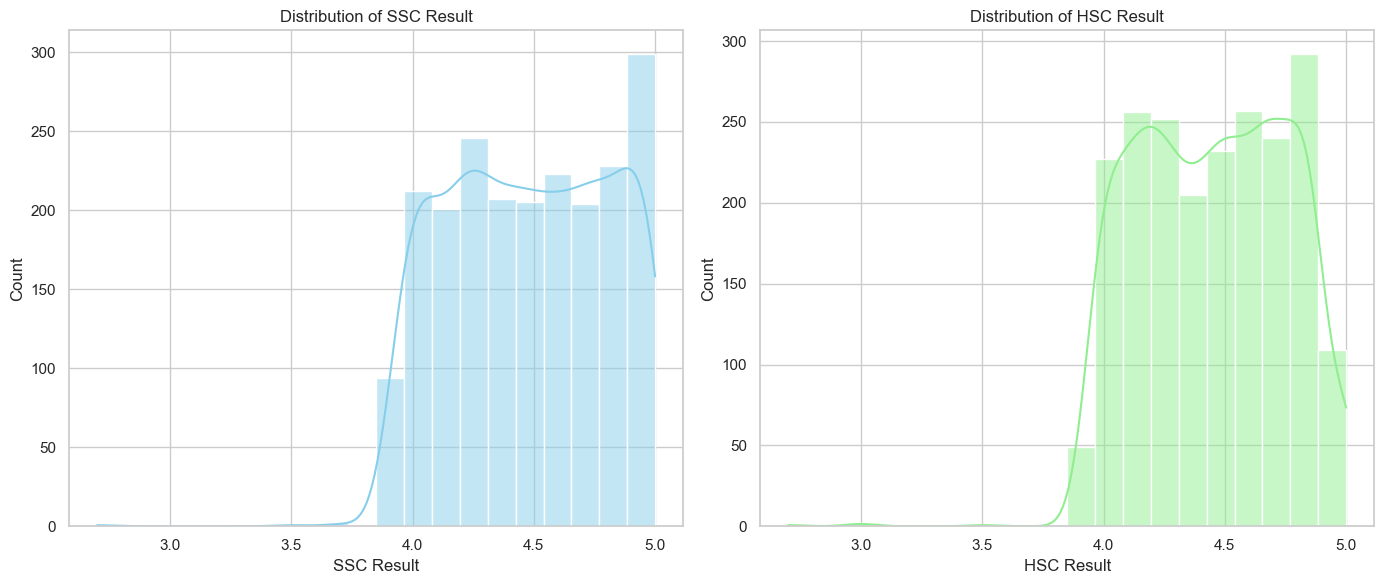

In [8]:
# Step 4: Visualize SSC and HSC Result Distributions
plt.figure(figsize=(14, 6))

# SSC result distribution
plt.subplot(1, 2, 1)
sns.histplot(df["SSC_result"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of SSC Result")
plt.xlabel("SSC Result")
plt.ylabel("Count")

# HSC result distribution
plt.subplot(1, 2, 2)
sns.histplot(df["HSC_result"], kde=True, bins=20, color="lightgreen")
plt.title("Distribution of HSC Result")
plt.xlabel("HSC Result")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [9]:
# Convert binary nominal features to numeric

# Define mappings
binary_mappings = {
    'gender': {'M': 1, 'F': 0},
    'address': {'U': 1, 'R': 0},
    'famsize': {'GT3': 1, 'LE3': 0},
    'pstatus': {'T': 1, 'A': 0},
    'relationship_breakdown': {'yes': 1, 'No': 0},
    'smoker': {'yes': 1, 'No': 0}
}

# Apply mappings
for column, mapping in binary_mappings.items():
    df[column] = df[column].map(mapping)

# Preview converted columns
display(df[['gender', 'address', 'famsize', 'pstatus', 'relationship_breakdown', 'smoker']].head())


gender  address  famsize  pstatus  relationship_breakdown  smoker
0       1        1        1      1.0                     1.0     0.0
1       1        1        1      1.0                     1.0     1.0
2       1        0        1      1.0                     1.0     1.0
3       0        1        1      1.0                     0.0     0.0
4       1        1        1      1.0                     0.0     0.0

In [10]:
#  One-Hot Encode 'Mjob' and 'Fjob' with integer type

# Strip extra spaces first
df['Mjob'] = df['Mjob'].str.strip()
df['Fjob'] = df['Fjob'].str.strip()

# One-hot encode and convert to integer
df = pd.get_dummies(df, columns=['Mjob', 'Fjob'], prefix=['Mjob', 'Fjob'])
df[df.columns[df.columns.str.startswith('Mjob_') | df.columns.str.startswith('Fjob_')]] = \
    df[df.columns[df.columns.str.startswith('Mjob_') | df.columns.str.startswith('Fjob_')]].astype(int)

In [11]:
# Confirm integer dtypes and preview
display(df.head())

gender  age  address  famsize  pstatus  M_education  F_education  \
0       1   23        1        1      1.0            2            3   
1       1   22        1        1      1.0            3            4   
2       1   24        0        1      1.0            1            3   
3       0   22        1        1      1.0            3            4   
4       1   23        1        1      1.0            4            4   

   relationship_breakdown  smoker  average_tuition_fee  ...  Mjob_at_home  \
0                     1.0     0.0               400000  ...             0   
1                     1.0     1.0               400000  ...             1   
2                     1.0     1.0               293000  ...             1   
3                     0.0     0.0               293000  ...             1   
4                     0.0     0.0               295000  ...             0   

   Mjob_health  Mjob_other  Mjob_services  Mjob_teacher  Fjob_at_home  \
0            0           1              0             0             0   
1            0           0              0             0             0   
2            0           0              0             0             0   
3            0           0              0             0             0   
4            0           0              0             1             0   

   Fjob_health  Fjob_other  Fjob_services  Fjob_teacher  
0            0           1              0             0  
1            0           1              0             0  
2            0           0              0             1  
3            0           1              0             0  
4            0           1              0             0  

[5 rows x 23 columns]

In [12]:
#  Define function to convert numeric results to letter grades
def map_grade(score):
    if score <= 0.99:
        return 'F'
    elif score <= 1.99:
        return 'D'
    elif score <= 2.99:
        return 'C'
    elif score <= 3.49:
        return 'B'
    elif score <= 3.99:
        return 'A-'
    elif score <= 4.99:
        return 'A'
    elif score == 5.0:
        return 'A+'

# Apply grade mapping to SSC_result and HSC_result
SSC_grade = df['SSC_result'].apply(map_grade)
HSC_grade = df['HSC_result'].apply(map_grade)

/var/folders/st/s6kmphz90nq0nyl9hct1z7_00000gn/T/ipykernel_1862/931165223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=SSC_grade, order=['F', 'D', 'C', 'B', 'A-', 'A','A+'], palette="Blues")
/var/folders/st/s6kmphz90nq0nyl9hct1z7_00000gn/T/ipykernel_1862/931165223.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=HSC_grade, order=['F', 'D', 'C', 'B', 'A-', 'A', 'A+'], palette="Greens")


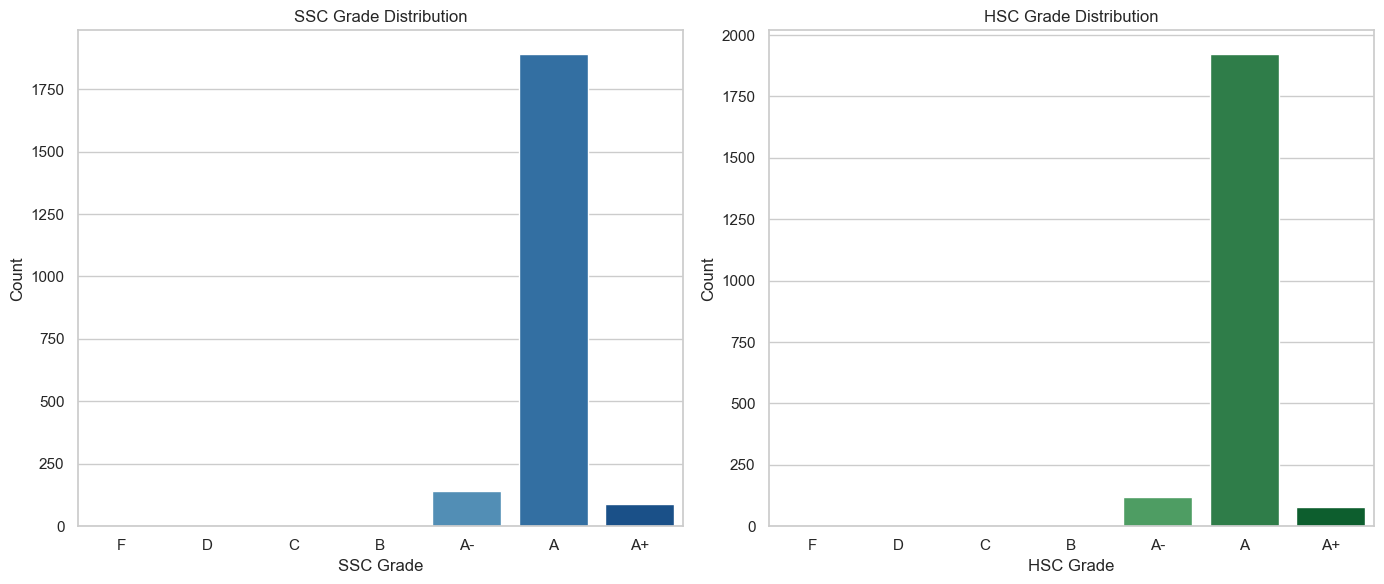

In [13]:
# Plot
plt.figure(figsize=(14, 6))

# SSC grade distribution
plt.subplot(1, 2, 1)
sns.countplot(x=SSC_grade, order=['F', 'D', 'C', 'B', 'A-', 'A','A+'], palette="Blues")
plt.title("SSC Grade Distribution")
plt.xlabel("SSC Grade")
plt.ylabel("Count")

# HSC grade distribution
plt.subplot(1, 2, 2)
sns.countplot(x=HSC_grade, order=['F', 'D', 'C', 'B', 'A-', 'A', 'A+'], palette="Greens")
plt.title("HSC Grade Distribution")
plt.xlabel("HSC Grade")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# Drop 'age' from features and define target as HSC_result
X = df.drop(columns=['HSC_result'])
y = df['HSC_result']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1698, 22)
X_test shape: (425, 22)
y_train shape: (1698,)
y_test shape: (425,)


In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)


 Top correlated features with HSC_result:
 HSC_result       1.000000
SSC_result       0.157353
F_education      0.087977
famsize          0.046635
Mjob_at_home     0.023928
gender           0.019465
Fjob_services    0.017787
Fjob_at_home     0.017417
Fjob_teacher     0.012124
Mjob_services    0.011672
Name: HSC_result, dtype: float64

 Least correlated features:
 pstatus                  -0.006676
Mjob_health              -0.006885
address                  -0.007253
average_tuition_fee      -0.016705
M_education              -0.028011
Fjob_health              -0.045969
Mjob_other               -0.049345
smoker                   -0.056129
relationship_breakdown   -0.071718
age                      -0.078469
Name: HSC_result, dtype: float64


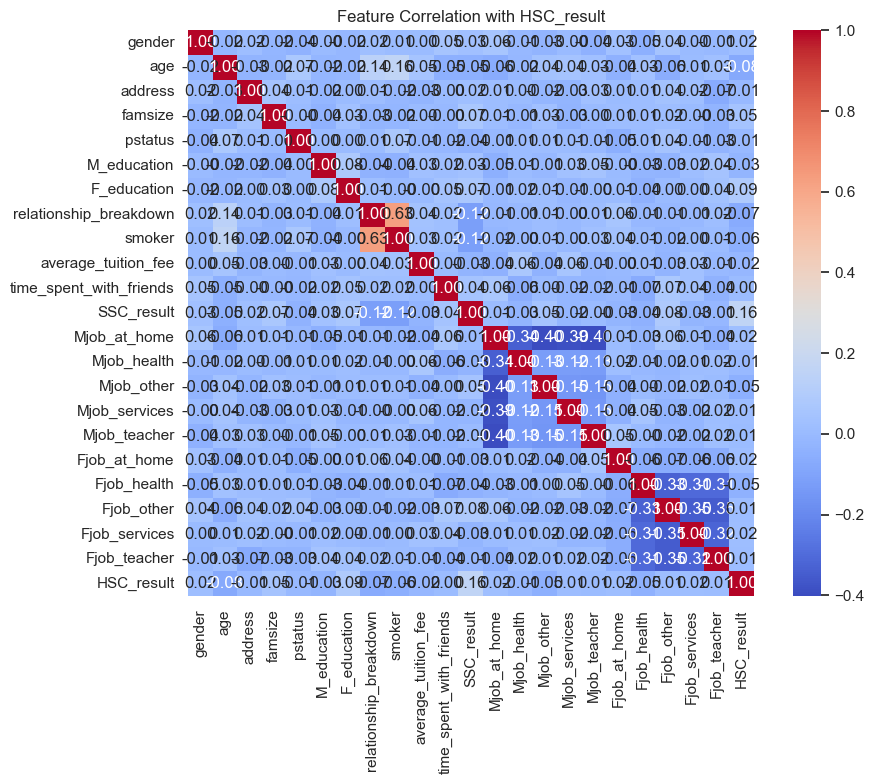

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Include HSC_result in the analysis
df_corr = X_train_imputed.copy()
df_corr['HSC_result'] = y_train

# Compute correlation
corr_matrix = df_corr.corr()

# Sort by HSC_result
sorted_corr = corr_matrix['HSC_result'].sort_values(ascending=False)

# Print top and bottom correlations
print(" Top correlated features with HSC_result:\n", sorted_corr.head(10))
print("\n Least correlated features:\n", sorted_corr.tail(10))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation with HSC_result")
plt.tight_layout()
plt.show()


In [17]:
# Set correlation threshold (absolute value)
threshold = 0.05

# Compute correlation with HSC_result
df_corr = X_train_imputed.copy()
df_corr['HSC_result'] = y_train
corr_matrix = df_corr.corr()
hsc_corr = corr_matrix['HSC_result'].drop('HSC_result')

# Automatically select low-correlation features
low_corr_features = hsc_corr[abs(hsc_corr) < threshold].index.tolist()

print("Dropping low-correlation features (|r| < 0.05):")
print(low_corr_features)

# Drop them from imputed training and test sets
X_train_fe = X_train_imputed.drop(columns=low_corr_features)
X_test_fe = X_test_imputed.drop(columns=low_corr_features)


Dropping low-correlation features (|r| < 0.05):
['gender', 'address', 'famsize', 'pstatus', 'M_education', 'average_tuition_fee', 'time_spent_with_friends', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher']


In [18]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd

# # Step 1: Impute missing values using mean strategy
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
# X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# # Step 2: Scale only selected columns
# scale_vars = ['age', 'M_education', 'F_education', 'average_tuition_fee', 'time_spent_with_friends']

# scaler = MinMaxScaler()
# # Apply scaling to selected columns
# X_train_imputed[scale_vars] = scaler.fit_transform(X_train_imputed[scale_vars])
# X_test_imputed[scale_vars] = scaler.transform(X_test_imputed[scale_vars])

# # Final scaled data
# X_train_scaled = X_train_imputed
# X_test_scaled = X_test_imputed

# # Preview
# X_train_scaled[scale_vars].head()


In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np

def evaluate_regressors_linear(train_X, train_y, test_X, test_y):
    regressors = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
    }
    
    results1 = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    
    for name, regressor in regressors.items():
        regressor.fit(train_X, train_y)
        predictions = regressor.predict(test_X)
        
        mse = mean_squared_error(test_y, predictions)
        rmse = np.sqrt(mse)  
        mae = mean_absolute_error(test_y, predictions)
        r2 = r2_score(test_y, predictions)
        
        results1.loc[name] = [mse, rmse, mae, r2]
    
    return results1


def evaluate_regressors_krnl(train_X, train_y, test_X, test_y):
    regressors3 = {
        'KNN Regressor': KNeighborsRegressor(),
        'SVR': SVR(),
    }
    
    results3 = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    
    for name, regressor in regressors3.items():
        regressor.fit(train_X, train_y)
        predictions = regressor.predict(test_X)
        
        mse = mean_squared_error(test_y, predictions)
        rmse = np.sqrt(mse)  
        mae = mean_absolute_error(test_y, predictions)
        r2 = r2_score(test_y, predictions)
        
        results3.loc[name] = [mse, rmse, mae, r2]
    
    return results3


def evaluate_regressors_tress(train_X, train_y, test_X, test_y):
    regressors2 = {
        'Random Forest': RandomForestRegressor(),
        'AdaBoost': AdaBoostRegressor(),
        'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42)
    }
    results2 = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    
    for name, regressor in regressors2.items():
        regressor.fit(train_X, train_y)
        predictions = regressor.predict(test_X)
        
        mse = mean_squared_error(test_y, predictions)
        rmse = np.sqrt(mse)  
        mae = mean_absolute_error(test_y, predictions)
        r2 = r2_score(test_y, predictions)
        
        results2.loc[name] = [mse, rmse, mae, r2]
    
    return results2

def evaluate_regressors_boosting(train_X, train_y, test_X, test_y):
    regressors = {
        'LightGBM': LGBMRegressor(random_state=42),
        'CatBoost': CatBoostRegressor(verbose=0, random_state=42)  # suppress output
    }

    results = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])

    for name, model in regressors.items():
        model.fit(train_X, train_y)
        preds = model.predict(test_X)

        mse = mean_squared_error(test_y, preds)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_y, preds)
        r2 = r2_score(test_y, preds)

        results.loc[name] = [mse, rmse, mae, r2]

    return results

# Call with imputed data (not scaled unless needed)
results_full = evaluate_regressors_linear(X_train_imputed, y_train, X_test_imputed, y_test)
print("Results with Full Features:\n")
print(results_full)

reseults_full = evaluate_regressors_krnl(X_train_imputed, y_train, X_test_imputed, y_test)
print("\n \n Results with SVR and KNN:\n")
print(reseults_full)


results_full = evaluate_regressors_tress(X_train_imputed, y_train, X_test_imputed, y_test)
print("\n \n Results with Full Features:\n")
print(results_full)

print("\n\n")
results_full = evaluate_regressors_boosting(X_train_imputed, y_train, X_test_imputed, y_test)
print("\n \n Results with Boosting Models:\n")
print(results_full)

NameError: name 'X_train_imputed' is not defined

In [20]:
# Call with imputed data
results_fe = evaluate_regressors_linear(X_train_fe, y_train, X_test_fe, y_test)
print("\n \n Results after Features Selection:\n")
print(results_fe)
# For linear models 
results_fe = evaluate_regressors_krnl(X_train_fe, y_train, X_test_fe, y_test)
print("\n \n Results after Features Selection:\n")
print(results_fe)


print("\n\n")
# For boosting models
results_fe = evaluate_regressors_boosting(X_train_fe, y_train, X_test_fe, y_test)
print("\n \n Results after Features Selection:\n")
print(results_fe)


 
 Results after Features Selection:

                        MSE      RMSE       MAE  R2 Score
Linear Regression  0.089139  0.298562  0.262995  0.032422
Ridge Regression   0.089211  0.298683  0.263122  0.031637
Lasso Regression   0.092335  0.303867  0.268669 -0.002270

 
 Results after Features Selection:

                    MSE      RMSE       MAE  R2 Score
KNN Regressor  0.099250  0.315040  0.267275 -0.077334
SVR            0.088047  0.296727  0.260950  0.044273



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 133
[LightGBM] [Info] Number of data points in the train set: 1698, number of used features: 5
[LightGBM] [Info] Start training from score 4.447208

 
 Results after Features Selection:

               MSE      RMSE       MAE  R2 Score
LightGBM  0.090377  0.300628  0.25

In [21]:
# Copy only the feature-selected DataFrame
X_train_eng = X_train_fe.copy()
X_test_eng = X_test_fe.copy()

# Add interaction: Parent education score
X_train_eng['parent_edu_score'] = (
    X_train_imputed['M_education'] * X_train_imputed['F_education']
)
X_test_eng['parent_edu_score'] = (
    X_test_imputed['M_education'] * X_test_imputed['F_education']
)

# Add log-transformed tuition
X_train_eng['log_tuition'] = np.log1p(X_train_imputed['average_tuition_fee'])
X_test_eng['log_tuition'] = np.log1p(X_test_imputed['average_tuition_fee'])


In [22]:
# For linear models (engineered features after feature selection)
results_linear = evaluate_regressors_linear(X_train_eng, y_train, X_test_eng, y_test)
print("Linear Models with feature engineering:")
print(results_linear)

# For kernel models (engineered features after feature selection)
results_kernel = evaluate_regressors_krnl(X_train_eng, y_train, X_test_eng, y_test)
print("\nKernel Models with feature engineering:")
print(results_kernel)


print("\n\n")
#for boosting models (engineered features after feature selection)
results_boosting = evaluate_regressors_boosting(X_train_eng, y_train, X_test_eng, y_test)
print("\n \n Results with Boosting Models:\n")
print(results_boosting)

Linear Models with feature engineering:
                        MSE      RMSE       MAE  R2 Score
Linear Regression  0.089386  0.298975  0.263400  0.029743
Ridge Regression   0.089454  0.299089  0.263520  0.029003
Lasso Regression   0.092335  0.303867  0.268669 -0.002270

Kernel Models with feature engineering:
                    MSE      RMSE       MAE  R2 Score
KNN Regressor  0.101614  0.318769  0.266974 -0.102988
SVR            0.088828  0.298040  0.262690  0.035798



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 1698, number of used features: 7
[LightGBM] [Info] Start training from score 4.447208

 
 Results with Boosting Models:

               MSE      RMSE       MAE  R2 Score
LightGBM  0.092823  0.304669  0.259

## Preprocess techniques for linear models with GridSearchCV parameter tuning

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

def evaluate_regressors_linear(train_X, train_y, test_X, test_y):
    results = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])

    # Create binned target for StratifiedKFold
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    

    models = {
        'Linear Regression': Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95)),
            ('model', LinearRegression())
        ]),
        'Ridge Regression': GridSearchCV(
            Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('model', Ridge())
            ]),
            param_grid={'model__alpha': [0.01, 0.1, 1, 10]},
            cv=kfold,
            scoring='r2'
        ),
        'Lasso Regression': GridSearchCV(
            Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('model', Lasso(max_iter=5000))
            ]),
            param_grid={'model__alpha': [0.001, 0.01, 0.1, 1, 10]},
            cv=kfold,
            scoring='r2'
        )
    }

    for name, model in models.items():
        model.fit(train_X, train_y)
        predictions = model.predict(test_X)

        mse = mean_squared_error(test_y, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_y, predictions)
        r2 = r2_score(test_y, predictions)

        results.loc[name] = [mse, rmse, mae, r2]

    return results


In [24]:
print("Evaluation with PCA + Regularization + Scaling:\n")
results_df = evaluate_regressors_linear(X_train_eng, y_train, X_test_eng, y_test)
print(results_df)

Evaluation with PCA + Regularization + Scaling:

                        MSE      RMSE       MAE  R2 Score
Linear Regression  0.089028  0.298375  0.263086  0.033631
Ridge Regression   0.089023  0.298367  0.263097  0.033684
Lasso Regression   0.089007  0.298340  0.263151  0.033855


## Using pre processing techniques on kernals model

In [25]:
# In the evaluation did not use this because it was degrading performance
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers = lof.fit_predict(X_train_eng)
X_filtered = X_train_eng[outliers == 1]
y_filtered = y_train[outliers == 1]

In [26]:
def evaluate_regressors_krnl_kfold(X, y, n_splits=5):
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import KFold, GridSearchCV
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.svm import SVR
    from sklearn.preprocessing import PolynomialFeatures

    results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    models = {
        'KNN Regressor': Pipeline([
            ('scaler', StandardScaler()),
            ('knn', GridSearchCV(
                KNeighborsRegressor(),
                param_grid={'n_neighbors': [3, 5, 7]},
                cv=3,
                scoring='neg_mean_squared_error',
                n_jobs=-1
            ))
        ]),
        'SVR': Pipeline([
            ('poly',PolynomialFeatures(degree=2,interaction_only = True, include_bias=False)),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95)),  # Optional
            ('svr', GridSearchCV(
                SVR(),
                param_grid={
                    'kernel': ['rbf', 'linear'],
                    'C': [0.1, 1, 10],
                    'epsilon': [0.01, 0.1, 0.2]
                },
                cv=3,
                scoring='neg_mean_squared_error',
                n_jobs=-1
            ))
        ])
    }

    for name, model in models.items():
        fold_metrics = []

        for train_idx, test_idx in kf.split(X):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_tr, y_tr)
            preds = model.predict(X_te)

            mse = mean_squared_error(y_te, preds)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_te, preds)
            r2 = r2_score(y_te, preds)

            fold_metrics.append([mse, rmse, mae, r2])

        # Average across folds
        avg_scores = np.mean(fold_metrics, axis=0)
        results_df.loc[name] = avg_scores

    return results_df


In [27]:
print("Evaluation with KNN and SVR using K-Fold Cross-Validation:\n")
results_krnl = evaluate_regressors_krnl_kfold(X_train_eng, y_train, n_splits=5)
print(results_krnl)


Evaluation with KNN and SVR using K-Fold Cross-Validation:

                    MSE      RMSE       MAE  R2 Score
KNN Regressor  0.095484  0.308749  0.256412 -0.042753
SVR            0.084580  0.290514  0.244757  0.076760


## Pre process for tree based regresion

In [28]:
# For handling outliers in tree-based models, we can use Isolation Forest or Local Outlier Factor.

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X_train_imputed)

X_filtered_tree = X_train_eng[outliers == 1]
y_filtered_tree = y_train[outliers == 1]


In [29]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def evaluate_regressors_trees_kfold(X, y, n_splits=5):
    results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    models = {
        'Random Forest': GridSearchCV(
            RandomForestRegressor(random_state=42),
            param_grid={'n_estimators': [50, 100], 'max_depth': [None, 10]},
            cv=3,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        ),
        'AdaBoost': GridSearchCV(
            AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6), random_state=42),
            param_grid={
                'n_estimators': [100, 200, 300],
                'learning_rate': [0.05, 0.1, 0.2],
                'estimator__max_depth': [3, 4, 5]
            },
            cv=3,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        ),
        'XGBoost': GridSearchCV(
            XGBRegressor(objective='reg:squarederror', random_state=42),
            param_grid={
                'n_estimators': [50, 100],
                'max_depth': [3, 6],
                'learning_rate': [0.05, 0.1, 0.3]
            },
            cv=3,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
    }

    for name, model in models.items():
        fold_metrics = []

        for train_idx, test_idx in kf.split(X):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_tr, y_tr)
            preds = model.predict(X_te)

            mse = mean_squared_error(y_te, preds)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_te, preds)
            r2 = r2_score(y_te, preds)

            fold_metrics.append([mse, rmse, mae, r2])

        results_df.loc[name] = np.mean(fold_metrics, axis=0)

    return results_df


In [30]:
import sklearn
print(sklearn.__version__)


1.7.1


In [31]:
results_tree_models = evaluate_regressors_trees_kfold(X_train_imputed, y_train, n_splits=5)
print("Evaluation of Tree-Based Models with K-Fold and Preprocessing:\n")
print(results_tree_models)


Evaluation of Tree-Based Models with K-Fold and Preprocessing:

                    MSE      RMSE       MAE  R2 Score
Random Forest  0.083836  0.289398  0.243259  0.082988
AdaBoost       0.083054  0.288015  0.243517  0.092133
XGBoost        0.083165  0.288101  0.244233  0.092078


## From here using Another Parameter tuinig method on Every model

# For linear model using RandomizedSearchCV

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
from scipy.stats import loguniform

def evaluate_regressors_linear(train_X, train_y, test_X, test_y):
    results = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])

    # Use standard KFold (not stratified) for regression
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    models = {
        'Linear Regression': Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95)),
            ('model', LinearRegression())
        ]),
        'Ridge Regression': RandomizedSearchCV(
            Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('model', Ridge())
            ]),
            param_distributions={'model__alpha': loguniform(1e-3, 100)},
            n_iter=30, # Increased iterations for better search
            cv=kfold,
            scoring='r2',
            random_state=42,
            n_jobs=-1
        ),
        'Lasso Regression': RandomizedSearchCV(
            Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('model', Lasso(max_iter=10000))
            ]),
            param_distributions={'model__alpha': loguniform(1e-4, 10)},
            n_iter=30,
            cv=kfold,
            scoring='r2',
            random_state=42,
            n_jobs=-1
        )
    }

    for name, model in models.items():
        model.fit(train_X, train_y)
        predictions = model.predict(test_X)

        mse = mean_squared_error(test_y, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_y, predictions)
        r2 = r2_score(test_y, predictions)

        results.loc[name] = [mse, rmse, mae, r2]

    return results


In [33]:
print("Evaluation with PCA + Regularization + Scaling:\n")
results_df = evaluate_regressors_linear(X_train_eng, y_train, X_test_eng, y_test)
print(results_df)

Evaluation with PCA + Regularization + Scaling:

                        MSE      RMSE       MAE  R2 Score
Linear Regression  0.089028  0.298375  0.263086  0.033631
Ridge Regression   0.088999  0.298327  0.263176  0.033944
Lasso Regression   0.089007  0.298341  0.263296  0.033850


## For Kernal models

In [34]:
# Added early stoping to the kernel models evaluation
# Replace PolynomialFeatures with interaction features


from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

def evaluate_regressors_krnl_kfold(X, y, n_splits=5, n_iter=25):
    results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    models = {
        'KNN Regressor': Pipeline([
            ('scaler', StandardScaler()),
            ('knn', RandomizedSearchCV(
                KNeighborsRegressor(),
                param_distributions={
                    'n_neighbors': [3, 5, 7, 9, 11],
                    'weights': ['uniform', 'distance'],
                    'leaf_size': [20, 30, 40]
                },
                n_iter=n_iter,
                cv=3,
                scoring='neg_mean_squared_error',
                n_jobs=-1,
                random_state=42
            ))
        ]),
        'SVR': Pipeline([
            ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95)),
            ('svr', RandomizedSearchCV(
                SVR(),
                param_distributions={
                    'kernel': ['rbf', 'linear', 'poly'],
                    'C': np.logspace(-2, 2, 10),
                    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5],
                    'degree': [2, 3, 4],
                    'gamma': ['scale', 'auto']
                },
                n_iter=n_iter,
                cv=3,
                scoring='neg_mean_squared_error',
                n_jobs=-1,
                random_state=42
            ))
        ])
    }

    for name, model in models.items():
        fold_metrics = []

        for train_idx, test_idx in kf.split(X):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_tr, y_tr)
            preds = model.predict(X_te)

            mse = mean_squared_error(y_te, preds)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_te, preds)
            r2 = r2_score(y_te, preds)

            fold_metrics.append([mse, rmse, mae, r2])

        avg_scores = np.mean(fold_metrics, axis=0)
        results_df.loc[name] = avg_scores

    return results_df


In [35]:
results_kernel = evaluate_regressors_krnl_kfold(X_train_eng, y_train, n_splits=5, n_iter=30)
print("Evaluation with KNN and SVR using K-Fold Cross-Validation:\n")
print(results_kernel)

Evaluation with KNN and SVR using K-Fold Cross-Validation:

                    MSE      RMSE       MAE  R2 Score
KNN Regressor  0.091156  0.301659  0.252350  0.004405
SVR            0.085321  0.291804  0.246537  0.068475


## Using Stacking and bagging ensemble

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def evaluate_krnl_stack_bagging_kfold(X, y, n_splits=5, n_iter=25):
    results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Base search models
    knn_search = RandomizedSearchCV(
        KNeighborsRegressor(),
        param_distributions={
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'leaf_size': [20, 30, 40]
        },
        n_iter=n_iter,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )

    svr_search = RandomizedSearchCV(
        SVR(),
        param_distributions={
            'kernel': ['rbf', 'linear', 'poly'],
            'C': np.logspace(-2, 2, 10),
            'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5],
            'degree': [2, 3, 4],
            'gamma': ['scale', 'auto']
        },
        n_iter=n_iter,
        cv=3,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )

    models = {
        'KNN Regressor': Pipeline([
            ('scaler', StandardScaler()),
            ('knn', knn_search)
        ]),
        'SVR': Pipeline([
            ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95)),
            ('svr', svr_search)
        ])
    }

    # Stacking model
    stack_model = StackingRegressor(
        estimators=[
            ('knn', models['KNN Regressor']),
            ('svr', models['SVR'])
        ],
        final_estimator=Ridge()
    )

    # Bagging model using SVR as base
    bagging_model = Pipeline([
        ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('bagging', BaggingRegressor(estimator=SVR(kernel='rbf'), n_estimators=10, random_state=42, n_jobs=-1))
    ])

    models['Stacking (KNN + SVR)'] = stack_model
    models['Bagging SVR'] = bagging_model

    # Evaluate all models
    for name, model in models.items():
        fold_metrics = []

        for train_idx, test_idx in kf.split(X):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_tr, y_tr)
            preds = model.predict(X_te)

            mse = mean_squared_error(y_te, preds)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_te, preds)
            r2 = r2_score(y_te, preds)

            fold_metrics.append([mse, rmse, mae, r2])

        avg_scores = np.mean(fold_metrics, axis=0)
        results_df.loc[name] = avg_scores

    return results_df


In [37]:
resuults_kernel = evaluate_krnl_stack_bagging_kfold(X_train_eng, y_train, n_splits=5, n_iter=30)
print("Evaluation with KNN and SVR using K-Fold Cross-Validation:\n")
print(resuults_kernel)

Evaluation with KNN and SVR using K-Fold Cross-Validation:

                           MSE      RMSE       MAE  R2 Score
KNN Regressor         0.091156  0.301659  0.252350  0.004405
SVR                   0.085321  0.291804  0.246537  0.068475
Stacking (KNN + SVR)  0.085494  0.292100  0.246702  0.066634
Bagging SVR           0.087500  0.295532  0.246406  0.044284


# Using Optuna Hyperparameter Optimizer on Tree and other two models

In [38]:
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

def evaluate_regressors_optuna_kfold(X, y, n_trials=25, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])

    def objective_rf(trial):
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int("n_estimators", 50, 200),
            max_depth=trial.suggest_int("max_depth", 4, 16),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_ab(trial):
        base_est = DecisionTreeRegressor(max_depth=trial.suggest_int("base_max_depth", 2, 6))
        model = AdaBoostRegressor(
            estimator=base_est,
            n_estimators=trial.suggest_int("n_estimators", 50, 300),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_xgb(trial):
        model = XGBRegressor(
            n_estimators=trial.suggest_int("n_estimators", 50, 200),
            max_depth=trial.suggest_int("max_depth", 3, 10),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            objective='reg:squarederror',
            random_state=42,
            verbosity=0
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_lgb(trial):
        model = LGBMRegressor(
            n_estimators=trial.suggest_int("n_estimators", 50, 200),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            num_leaves=trial.suggest_int("num_leaves", 20, 50),
            max_depth=trial.suggest_int("max_depth", 3, 10),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_cb(trial):
        model = CatBoostRegressor(
            iterations=trial.suggest_int("iterations", 50, 200),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            depth=trial.suggest_int("depth", 3, 10),
            verbose=0,
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    studies = {
        'Random Forest': optuna.create_study(direction='maximize'),
        'AdaBoost': optuna.create_study(direction='maximize'),
        'XGBoost': optuna.create_study(direction='maximize'),
        'LightGBM': optuna.create_study(direction='maximize'),
        'CatBoost': optuna.create_study(direction='maximize')
    }

    objectives = {
        'Random Forest': objective_rf,
        'AdaBoost': objective_ab,
        'XGBoost': objective_xgb,
        'LightGBM': objective_lgb,
        'CatBoost': objective_cb
    }

    best_models = {}

    for name in studies:
        print(f"Optimizing {name}...")
        studies[name].optimize(objectives[name], n_trials=n_trials)
        best_params = studies[name].best_params

        if name == 'Random Forest':
            best_models[name] = RandomForestRegressor(**best_params, random_state=42)
        elif name == 'AdaBoost':
            base_est = DecisionTreeRegressor(max_depth=best_params.pop("base_max_depth"))
            best_models[name] = AdaBoostRegressor(estimator=base_est, **best_params, random_state=42)
        elif name == 'XGBoost':
            best_models[name] = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42, verbosity=0)
        elif name == 'LightGBM':
            best_models[name] = LGBMRegressor(**best_params, random_state=42)
        elif name == 'CatBoost':
            best_models[name] = CatBoostRegressor(**best_params, verbose=0, random_state=42)

    for name, model in best_models.items():
        fold_metrics = []

        for train_idx, test_idx in kf.split(X):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_tr, y_tr)
            preds = model.predict(X_te)

            mse = mean_squared_error(y_te, preds)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_te, preds)
            r2 = r2_score(y_te, preds)

            fold_metrics.append([mse, rmse, mae, r2])

        results_df.loc[name] = np.mean(fold_metrics, axis=0)

    return results_df


/opt/anaconda3/envs/CSE445_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
results_tree_models_optuna = evaluate_regressors_optuna_kfold(X_train_imputed, y_train, n_trials=25, n_splits=5)
print("Evaluation of Tree-Based Models with Optuna and K-Fold:\n")
print(results_tree_models_optuna)

[I 2025-08-06 20:37:16,731] A new study created in memory with name: no-name-f1335ae1-8c19-48ae-a09d-752bff53ec7a
[I 2025-08-06 20:37:16,731] A new study created in memory with name: no-name-08f872f0-e3b3-4498-965d-107da92abeea
[I 2025-08-06 20:37:16,731] A new study created in memory with name: no-name-42667b2b-c83d-4403-9a6a-0f34c197f9a7
[I 2025-08-06 20:37:16,732] A new study created in memory with name: no-name-6f95196c-d978-4576-8581-1d7d1ea3b93a
[I 2025-08-06 20:37:16,733] A new study created in memory with name: no-name-9d1d2fbe-f1eb-48ff-96a7-7d335e5df2f8


Optimizing Random Forest...


[I 2025-08-06 20:37:18,060] Trial 0 finished with value: -0.0862031578628559 and parameters: {'n_estimators': 118, 'max_depth': 15}. Best is trial 0 with value: -0.0862031578628559.
[I 2025-08-06 20:37:19,076] Trial 1 finished with value: -0.0836892778971979 and parameters: {'n_estimators': 143, 'max_depth': 9}. Best is trial 1 with value: -0.0836892778971979.
[I 2025-08-06 20:37:20,351] Trial 2 finished with value: -0.08386983842666036 and parameters: {'n_estimators': 162, 'max_depth': 10}. Best is trial 1 with value: -0.0836892778971979.
[I 2025-08-06 20:37:21,816] Trial 3 finished with value: -0.08602144961165356 and parameters: {'n_estimators': 126, 'max_depth': 15}. Best is trial 1 with value: -0.0836892778971979.
[I 2025-08-06 20:37:22,368] Trial 4 finished with value: -0.08295594596521533 and parameters: {'n_estimators': 147, 'max_depth': 4}. Best is trial 4 with value: -0.08295594596521533.
[I 2025-08-06 20:37:23,882] Trial 5 finished with value: -0.08469595555882084 and parame

Optimizing AdaBoost...


[I 2025-08-06 20:37:34,669] Trial 1 finished with value: -0.084048680377853 and parameters: {'base_max_depth': 5, 'n_estimators': 78, 'learning_rate': 0.8492895461551316}. Best is trial 1 with value: -0.084048680377853.
[I 2025-08-06 20:37:34,947] Trial 2 finished with value: -0.08396809403845693 and parameters: {'base_max_depth': 4, 'n_estimators': 132, 'learning_rate': 0.3468505207949687}. Best is trial 2 with value: -0.08396809403845693.
[I 2025-08-06 20:37:36,372] Trial 3 finished with value: -0.08442297980925438 and parameters: {'base_max_depth': 6, 'n_estimators': 212, 'learning_rate': 0.6599744017245863}. Best is trial 2 with value: -0.08396809403845693.
[I 2025-08-06 20:37:36,932] Trial 4 finished with value: -0.08381273504413697 and parameters: {'base_max_depth': 4, 'n_estimators': 168, 'learning_rate': 0.08539196661891786}. Best is trial 4 with value: -0.08381273504413697.
[I 2025-08-06 20:37:36,978] Trial 5 finished with value: -0.08422974456162677 and parameters: {'base_max

Optimizing XGBoost...


[I 2025-08-06 20:37:45,904] Trial 0 finished with value: -0.08989045944925432 and parameters: {'n_estimators': 86, 'max_depth': 10, 'learning_rate': 0.04325301935999373}. Best is trial 0 with value: -0.08989045944925432.
[I 2025-08-06 20:37:47,076] Trial 1 finished with value: -0.09904400066568933 and parameters: {'n_estimators': 163, 'max_depth': 7, 'learning_rate': 0.09830406355016748}. Best is trial 0 with value: -0.08989045944925432.
[I 2025-08-06 20:37:48,115] Trial 2 finished with value: -0.10504913326139254 and parameters: {'n_estimators': 136, 'max_depth': 7, 'learning_rate': 0.24043706089757044}. Best is trial 0 with value: -0.08989045944925432.
[I 2025-08-06 20:37:48,683] Trial 3 finished with value: -0.0867979859324854 and parameters: {'n_estimators': 170, 'max_depth': 3, 'learning_rate': 0.1103798975858756}. Best is trial 3 with value: -0.0867979859324854.
[I 2025-08-06 20:37:49,044] Trial 4 finished with value: -0.09015241151175331 and parameters: {'n_estimators': 107, 'ma

Optimizing LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[I 2025-08-06 20:38:09,215] Trial 0 finished with value: -0.08758520851261045 and parameters: {'n_estimators': 188, 'learning_rate': 0.013407332754656791, 'num_leaves': 50, 'max_depth': 10}. Best is trial 0 with value: -0.08758520851261045.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:09,645] Trial 1 finished with value: -0.09038226847918103 and parameters: {'n_estimators': 115, 'learning_rate': 0.22771949120083043, 'num_leaves': 37, 'max_depth': 3}. Best is trial 0 with value: -0.08758520851261045.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:10,056] Trial 2 finished with value: -0.08877066267225195 and parameters: {'n_estimators': 75, 'learning_rate': 0.16515235345356663, 'num_leaves': 39, 'max_depth': 4}. Best is trial 0 with value: -0.08758520851261045.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:13,096] Trial 3 finished with value: -0.10627720135101479 and parameters: {'n_estimators': 193, 'learning_rate': 0.13100272622003903, 'num_leaves': 46, 'max_depth': 9}. Best is trial 0 with value: -0.08758520851261045.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:13,740] Trial 4 finished with value: -0.09496222363563642 and parameters: {'n_estimators': 170, 'learning_rate': 0.2850888811520733, 'num_leaves': 34, 'max_depth': 3}. Best is trial 0 with value: -0.08758520851261045.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:15,506] Trial 5 finished with value: -0.10581742700626792 and parameters: {'n_estimators': 125, 'learning_rate': 0.2017914257444804, 'num_leaves': 48, 'max_depth': 8}. Best is trial 0 with value: -0.08758520851261045.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:17,518] Trial 6 finished with value: -0.0915484342495706 and parameters: {'n_estimators': 159, 'learning_rate': 0.05592805491385532, 'num_leaves': 23, 'max_depth': 10}. Best is trial 0 with value: -0.08758520851261045.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:38:19,327] Trial 7 finished with value: -0.09660135315770411 and parameters: {'n_estimators': 107, 'learning_rate': 0.11220098855057231, 'num_leaves': 35, 'max_depth': 10}. Best is trial 0 with value: -0.08758520851261045.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:20,058] Trial 8 finished with value: -0.09995185559127771 and parameters: {'n_estimators': 60, 'learning_rate': 0.29657797384254875, 'num_leaves': 45, 'max_depth': 7}. Best is trial 0 with value: -0.08758520851261045.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-ch

[I 2025-08-06 20:38:20,995] Trial 9 finished with value: -0.08757744012160476 and parameters: {'n_estimators': 78, 'learning_rate': 0.058634903803970295, 'num_leaves': 21, 'max_depth': 9}. Best is trial 9 with value: -0.08757744012160476.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 1359, number of used features: 21
[LightGBM] [Info] Start training from score 4.444901
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remov

[I 2025-08-06 20:38:21,750] Trial 10 finished with value: -0.08788130251483137 and parameters: {'n_estimators': 86, 'learning_rate': 0.08209472205388788, 'num_leaves': 20, 'max_depth': 6}. Best is trial 9 with value: -0.08757744012160476.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:23,914] Trial 11 finished with value: -0.08695805103980393 and parameters: {'n_estimators': 154, 'learning_rate': 0.01726636476205532, 'num_leaves': 28, 'max_depth': 8}. Best is trial 11 with value: -0.08695805103980393.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:38:25,804] Trial 12 finished with value: -0.09027517314377395 and parameters: {'n_estimators': 150, 'learning_rate': 0.05065131982996438, 'num_leaves': 27, 'max_depth': 8}. Best is trial 11 with value: -0.08695805103980393.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:27,110] Trial 13 finished with value: -0.08517313651174689 and parameters: {'n_estimators': 144, 'learning_rate': 0.014303123654984568, 'num_leaves': 28, 'max_depth': 6}. Best is trial 13 with value: -0.08517313651174689.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:38:27,997] Trial 14 finished with value: -0.0848807710460142 and parameters: {'n_estimators': 143, 'learning_rate': 0.011547936984266167, 'num_leaves': 29, 'max_depth': 5}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:28,951] Trial 15 finished with value: -0.09010721688339794 and parameters: {'n_estimators': 137, 'learning_rate': 0.09403334841573294, 'num_leaves': 30, 'max_depth': 5}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:30,174] Trial 16 finished with value: -0.0850315635119206 and parameters: {'n_estimators': 177, 'learning_rate': 0.015063986296976972, 'num_leaves': 31, 'max_depth': 5}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:31,479] Trial 17 finished with value: -0.09717654224285563 and parameters: {'n_estimators': 170, 'learning_rate': 0.16523552413788045, 'num_leaves': 32, 'max_depth': 5}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:32,783] Trial 18 finished with value: -0.08681450352941963 and parameters: {'n_estimators': 176, 'learning_rate': 0.038793571835692875, 'num_leaves': 24, 'max_depth': 5}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:33,487] Trial 19 finished with value: -0.08735355189344923 and parameters: {'n_estimators': 129, 'learning_rate': 0.07484535967189346, 'num_leaves': 42, 'max_depth': 4}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:34,022] Trial 20 finished with value: -0.08875879769523032 and parameters: {'n_estimators': 100, 'learning_rate': 0.13030446243156102, 'num_leaves': 32, 'max_depth': 4}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:35,320] Trial 21 finished with value: -0.0855370377413941 and parameters: {'n_estimators': 136, 'learning_rate': 0.021274219354976157, 'num_leaves': 27, 'max_depth': 6}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:36,727] Trial 22 finished with value: -0.08534204154081018 and parameters: {'n_estimators': 148, 'learning_rate': 0.0109455291615009, 'num_leaves': 25, 'max_depth': 6}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:38,789] Trial 23 finished with value: -0.0893802997371729 and parameters: {'n_estimators': 180, 'learning_rate': 0.041694053423064745, 'num_leaves': 31, 'max_depth': 7}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:40,234] Trial 24 finished with value: -0.08725762376872806 and parameters: {'n_estimators': 200, 'learning_rate': 0.037713019772192796, 'num_leaves': 30, 'max_depth': 5}. Best is trial 14 with value: -0.0848807710460142.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:38:41,092] Trial 0 finished with value: -0.09853661495935294 and parameters: {'iterations': 176, 'learning_rate': 0.21197315903151567, 'depth': 10}. Best is trial 0 with value: -0.09853661495935294.
[I 2025-08-06 20:38:41,389] Trial 1 finished with value: -0.08412491117276888 and parameters: {'iterations': 64, 'learning_rate': 0.04947592655519127, 'depth': 10}. Best is trial 1 with value: -0.08412491117276888.
[I 2025-08-06 20:38:41,613] Trial 2 finished with value: -0.09470181256725574 and parameters: {'iterations': 178, 'learning_rate': 0.24295394799117986, 'depth': 6}. Best is trial 1 with value: -0.08412491117276888.
[I 2025-08-06 20:38:41,701] Trial 3 finished with value: -0.0846119143567604 and parameters: {'iterations': 126, 'learning_rate': 0.2014285117463644, 'depth': 3}. Best is trial 1 with value: -0.08412491117276888.
[I 2025-08-06 20:38:42,114] Trial 4 finished with value: -0.08359485068561162 and parameters: {'iterations': 134, 'learning_rate': 0.04284617

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

# Ensemble 1 of tree models

In [40]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

def evaluate_regressors_optuna_kfold_with_stacking(X, y, n_trials=25, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])

    def objective_rf(trial):
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            max_depth=trial.suggest_int("max_depth", 5, 20),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_ab(trial):
        base_est = DecisionTreeRegressor(max_depth=trial.suggest_int("base_max_depth", 3, 7))
        model = AdaBoostRegressor(
            estimator=base_est,
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_xgb(trial):
        model = XGBRegressor(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            max_depth=trial.suggest_int("max_depth", 4, 10),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            objective='reg:squarederror',
            random_state=42,
            verbosity=0
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_lgb(trial):
        model = LGBMRegressor(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            num_leaves=trial.suggest_int("num_leaves", 20, 50),
            max_depth=trial.suggest_int("max_depth", 4, 10),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_cb(trial):
        model = CatBoostRegressor(
            iterations=trial.suggest_int("iterations", 100, 300),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            depth=trial.suggest_int("depth", 4, 10),
            verbose=0,
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    studies = {
        'Random Forest': optuna.create_study(direction='maximize'),
        'AdaBoost': optuna.create_study(direction='maximize'),
        'XGBoost': optuna.create_study(direction='maximize'),
        'LightGBM': optuna.create_study(direction='maximize'),
        'CatBoost': optuna.create_study(direction='maximize')
    }

    objectives = {
        'Random Forest': objective_rf,
        'AdaBoost': objective_ab,
        'XGBoost': objective_xgb,
        'LightGBM': objective_lgb,
        'CatBoost': objective_cb
    }

    best_models = {}

    for name in studies:
        print(f"Optimizing {name}...")
        studies[name].optimize(objectives[name], n_trials=n_trials)
        best_params = studies[name].best_params

        if name == 'Random Forest':
            best_models[name] = RandomForestRegressor(**best_params, random_state=42)
        elif name == 'AdaBoost':
            base_est = DecisionTreeRegressor(max_depth=best_params.pop("base_max_depth"))
            best_models[name] = AdaBoostRegressor(estimator=base_est, **best_params, random_state=42)
        elif name == 'XGBoost':
            best_models[name] = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42, verbosity=0)
        elif name == 'LightGBM':
            best_models[name] = LGBMRegressor(**best_params, random_state=42)
        elif name == 'CatBoost':
            best_models[name] = CatBoostRegressor(**best_params, verbose=0, random_state=42)

    # Add stacking ensemble
    stacking_model = StackingRegressor(
        estimators=[
            ('xgb', best_models['XGBoost']),
            ('lgb', best_models['LightGBM']),
            ('cb', best_models['CatBoost']),
        ],
        final_estimator=Ridge(),
        n_jobs=-1
    )
    best_models['Stacking (XGB+LGB+CB)'] = stacking_model

    for name, model in best_models.items():
        fold_metrics = []
        for train_idx, test_idx in kf.split(X):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]
            model.fit(X_tr, y_tr)
            preds = model.predict(X_te)

            mse = mean_squared_error(y_te, preds)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_te, preds)
            r2 = r2_score(y_te, preds)
            fold_metrics.append([mse, rmse, mae, r2])

        results_df.loc[name] = np.mean(fold_metrics, axis=0)

    #import ace_tools as tools; tools.display_dataframe_to_user(name="Ensemble Tree Regressors Evaluation", dataframe=results_df)
    return results_df


In [41]:
results_final = evaluate_regressors_optuna_kfold_with_stacking(X_train_imputed, y_train, n_trials=30, n_splits=5)
print("Evaluation of Tree-Based Models with Optuna, K-Fold, and Stacking:\n")
print(results_final)

[I 2025-08-06 20:38:47,762] A new study created in memory with name: no-name-59a35562-60ab-4f48-88d4-e7693c7d21f9
[I 2025-08-06 20:38:47,762] A new study created in memory with name: no-name-e0d3ddf3-2f07-480b-87e8-00621ddf7388
[I 2025-08-06 20:38:47,763] A new study created in memory with name: no-name-b37bb485-d6b8-4714-83dd-27da48843541
[I 2025-08-06 20:38:47,763] A new study created in memory with name: no-name-ba1f7822-93a5-41b2-8395-8ffe826b8609
[I 2025-08-06 20:38:47,763] A new study created in memory with name: no-name-eee258f6-faf8-4b56-887d-4b0822b25023


Optimizing Random Forest...


[I 2025-08-06 20:38:49,930] Trial 0 finished with value: -0.08584629079348381 and parameters: {'n_estimators': 188, 'max_depth': 16}. Best is trial 0 with value: -0.08584629079348381.
[I 2025-08-06 20:38:50,598] Trial 1 finished with value: -0.08301897088518728 and parameters: {'n_estimators': 132, 'max_depth': 6}. Best is trial 1 with value: -0.08301897088518728.
[I 2025-08-06 20:38:51,851] Trial 2 finished with value: -0.0835299005217804 and parameters: {'n_estimators': 178, 'max_depth': 9}. Best is trial 1 with value: -0.08301897088518728.
[I 2025-08-06 20:38:53,675] Trial 3 finished with value: -0.08369592021446197 and parameters: {'n_estimators': 239, 'max_depth': 10}. Best is trial 1 with value: -0.08301897088518728.
[I 2025-08-06 20:38:54,798] Trial 4 finished with value: -0.08502364300995309 and parameters: {'n_estimators': 114, 'max_depth': 13}. Best is trial 1 with value: -0.08301897088518728.
[I 2025-08-06 20:38:57,981] Trial 5 finished with value: -0.0857928897768285 and pa

Optimizing AdaBoost...


[I 2025-08-06 20:39:26,355] Trial 0 finished with value: -0.0828514887480685 and parameters: {'base_max_depth': 7, 'n_estimators': 259, 'learning_rate': 0.09347680390017832}. Best is trial 0 with value: -0.0828514887480685.
[I 2025-08-06 20:39:27,396] Trial 1 finished with value: -0.08314254236107962 and parameters: {'base_max_depth': 7, 'n_estimators': 127, 'learning_rate': 0.3252940396619134}. Best is trial 0 with value: -0.0828514887480685.
[I 2025-08-06 20:39:27,930] Trial 2 finished with value: -0.0837136847995578 and parameters: {'base_max_depth': 4, 'n_estimators': 233, 'learning_rate': 0.08875123105940351}. Best is trial 0 with value: -0.0828514887480685.
[I 2025-08-06 20:39:28,394] Trial 3 finished with value: -0.08353393018855627 and parameters: {'base_max_depth': 5, 'n_estimators': 164, 'learning_rate': 0.31221186469140194}. Best is trial 0 with value: -0.0828514887480685.
[I 2025-08-06 20:39:28,518] Trial 4 finished with value: -0.08296075508012368 and parameters: {'base_ma

Optimizing XGBoost...


[I 2025-08-06 20:39:59,674] Trial 0 finished with value: -0.10052478270678514 and parameters: {'n_estimators': 204, 'max_depth': 9, 'learning_rate': 0.07680100549353798}. Best is trial 0 with value: -0.10052478270678514.
[I 2025-08-06 20:40:00,895] Trial 1 finished with value: -0.1053791300718333 and parameters: {'n_estimators': 290, 'max_depth': 8, 'learning_rate': 0.2654583401863918}. Best is trial 0 with value: -0.10052478270678514.
[I 2025-08-06 20:40:02,155] Trial 2 finished with value: -0.08652197204008089 and parameters: {'n_estimators': 221, 'max_depth': 6, 'learning_rate': 0.022271044431396127}. Best is trial 2 with value: -0.08652197204008089.
[I 2025-08-06 20:40:03,364] Trial 3 finished with value: -0.10335501144256351 and parameters: {'n_estimators': 248, 'max_depth': 10, 'learning_rate': 0.19081164574245482}. Best is trial 2 with value: -0.08652197204008089.
[I 2025-08-06 20:40:04,485] Trial 4 finished with value: -0.10441708551524091 and parameters: {'n_estimators': 154, 

Optimizing LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[I 2025-08-06 20:40:27,729] Trial 0 finished with value: -0.10329612387678307 and parameters: {'n_estimators': 195, 'learning_rate': 0.1418534771594089, 'num_leaves': 44, 'max_depth': 8}. Best is trial 0 with value: -0.10329612387678307.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:40:29,552] Trial 1 finished with value: -0.09117185116659049 and parameters: {'n_estimators': 257, 'learning_rate': 0.07187978149030719, 'num_leaves': 34, 'max_depth': 5}. Best is trial 1 with value: -0.09117185116659049.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:40:32,743] Trial 2 finished with value: -0.09097199817126546 and parameters: {'n_estimators': 274, 'learning_rate': 0.03992976247468978, 'num_leaves': 23, 'max_depth': 8}. Best is trial 2 with value: -0.09097199817126546.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:40:34,164] Trial 3 finished with value: -0.09436779384312807 and parameters: {'n_estimators': 257, 'learning_rate': 0.11695158805147324, 'num_leaves': 21, 'max_depth': 4}. Best is trial 2 with value: -0.09097199817126546.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:40:37,338] Trial 4 finished with value: -0.10950927940470083 and parameters: {'n_estimators': 267, 'learning_rate': 0.1536844827732939, 'num_leaves': 29, 'max_depth': 7}. Best is trial 2 with value: -0.09097199817126546.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

[I 2025-08-06 20:40:38,931] Trial 5 finished with value: -0.10261094159717417 and parameters: {'n_estimators': 276, 'learning_rate': 0.21536679316256846, 'num_leaves': 30, 'max_depth': 4}. Best is trial 2 with value: -0.09097199817126546.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:40:40,670] Trial 6 finished with value: -0.10937595190972169 and parameters: {'n_estimators': 139, 'learning_rate': 0.25766324201008556, 'num_leaves': 41, 'max_depth': 7}. Best is trial 2 with value: -0.09097199817126546.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:40:42,373] Trial 7 finished with value: -0.09352684356545557 and parameters: {'n_estimators': 100, 'learning_rate': 0.09652723098113379, 'num_leaves': 34, 'max_depth': 10}. Best is trial 2 with value: -0.09097199817126546.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:40:44,237] Trial 8 finished with value: -0.10902648731198536 and parameters: {'n_estimators': 170, 'learning_rate': 0.2724608816907329, 'num_leaves': 20, 'max_depth': 8}. Best is trial 2 with value: -0.09097199817126546.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:40:48,044] Trial 9 finished with value: -0.1165268875986849 and parameters: {'n_estimators': 239, 'learning_rate': 0.23641963858460857, 'num_leaves': 43, 'max_depth': 8}. Best is trial 2 with value: -0.09097199817126546.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-ch

[I 2025-08-06 20:40:52,341] Trial 10 finished with value: -0.08902236421065846 and parameters: {'n_estimators': 294, 'learning_rate': 0.0164074757283159, 'num_leaves': 26, 'max_depth': 10}. Best is trial 10 with value: -0.08902236421065846.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data poin

[I 2025-08-06 20:40:56,762] Trial 11 finished with value: -0.08757601286685508 and parameters: {'n_estimators': 294, 'learning_rate': 0.010600899129227659, 'num_leaves': 26, 'max_depth': 10}. Best is trial 11 with value: -0.08757601286685508.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:41:01,270] Trial 12 finished with value: -0.09114031387525887 and parameters: {'n_estimators': 300, 'learning_rate': 0.02446007886974355, 'num_leaves': 27, 'max_depth': 10}. Best is trial 11 with value: -0.08757601286685508.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, nu

[I 2025-08-06 20:41:05,935] Trial 13 finished with value: -0.08813481448002419 and parameters: {'n_estimators': 219, 'learning_rate': 0.012344967717233092, 'num_leaves': 49, 'max_depth': 10}. Best is trial 11 with value: -0.08757601286685508.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:41:09,371] Trial 14 finished with value: -0.0976821767948016 and parameters: {'n_estimators': 215, 'learning_rate': 0.06956714281151943, 'num_leaves': 49, 'max_depth': 9}. Best is trial 11 with value: -0.08757601286685508.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:41:13,036] Trial 15 finished with value: -0.1116934613243735 and parameters: {'n_estimators': 219, 'learning_rate': 0.18736056728686729, 'num_leaves': 50, 'max_depth': 9}. Best is trial 11 with value: -0.08757601286685508.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:41:14,543] Trial 16 finished with value: -0.08921251436571928 and parameters: {'n_estimators': 165, 'learning_rate': 0.057177410515853705, 'num_leaves': 38, 'max_depth': 6}. Best is trial 11 with value: -0.08757601286685508.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:41:18,261] Trial 17 finished with value: -0.10448951221587226 and parameters: {'n_estimators': 238, 'learning_rate': 0.10344675741713875, 'num_leaves': 38, 'max_depth': 9}. Best is trial 11 with value: -0.08757601286685508.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:41:21,630] Trial 18 finished with value: -0.08771122486283048 and parameters: {'n_estimators': 185, 'learning_rate': 0.015889424667129226, 'num_leaves': 32, 'max_depth': 10}. Best is trial 11 with value: -0.08757601286685508.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:41:24,375] Trial 19 finished with value: -0.09236915897487186 and parameters: {'n_estimators': 182, 'learning_rate': 0.04896519480414559, 'num_leaves': 32, 'max_depth': 9}. Best is trial 11 with value: -0.08757601286685508.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:41:26,411] Trial 20 finished with value: -0.09421016237811898 and parameters: {'n_estimators': 138, 'learning_rate': 0.09004235719492124, 'num_leaves': 27, 'max_depth': 10}. Best is trial 11 with value: -0.08757601286685508.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453

[I 2025-08-06 20:41:29,354] Trial 21 finished with value: -0.08672775375283669 and parameters: {'n_estimators': 211, 'learning_rate': 0.012175298218254872, 'num_leaves': 24, 'max_depth': 10}. Best is trial 21 with value: -0.08672775375283669.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data poin

[I 2025-08-06 20:41:31,286] Trial 22 finished with value: -0.08901503758126912 and parameters: {'n_estimators': 147, 'learning_rate': 0.03944702577830846, 'num_leaves': 24, 'max_depth': 9}. Best is trial 21 with value: -0.08672775375283669.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=tru

[I 2025-08-06 20:41:34,516] Trial 23 finished with value: -0.08820813500415442 and parameters: {'n_estimators': 191, 'learning_rate': 0.018942233305737743, 'num_leaves': 29, 'max_depth': 10}. Best is trial 21 with value: -0.08672775375283669.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:41:36,045] Trial 24 finished with value: -0.09601791115456046 and parameters: {'n_estimators': 120, 'learning_rate': 0.13112993643906112, 'num_leaves': 24, 'max_depth': 9}. Best is trial 21 with value: -0.08672775375283669.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:41:37,967] Trial 25 finished with value: -0.09253332472345162 and parameters: {'n_estimators': 205, 'learning_rate': 0.07985816236893155, 'num_leaves': 31, 'max_depth': 6}. Best is trial 21 with value: -0.08672775375283669.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:41:41,343] Trial 26 finished with value: -0.09259846971854535 and parameters: {'n_estimators': 235, 'learning_rate': 0.0401548102191651, 'num_leaves': 26, 'max_depth': 10}. Best is trial 21 with value: -0.08672775375283669.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

[I 2025-08-06 20:41:43,648] Trial 27 finished with value: -0.08612984547946657 and parameters: {'n_estimators': 173, 'learning_rate': 0.011489495832874773, 'num_leaves': 22, 'max_depth': 9}. Best is trial 27 with value: -0.08612984547946657.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remov

[I 2025-08-06 20:41:45,607] Trial 28 finished with value: -0.10383093242113554 and parameters: {'n_estimators': 160, 'learning_rate': 0.18454627188430198, 'num_leaves': 22, 'max_depth': 9}. Best is trial 27 with value: -0.08612984547946657.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:41:46,892] Trial 29 finished with value: -0.08901472725637957 and parameters: {'n_estimators': 116, 'learning_rate': 0.05978402746476979, 'num_leaves': 20, 'max_depth': 8}. Best is trial 27 with value: -0.08612984547946657.


Optimizing CatBoost...


[I 2025-08-06 20:41:47,286] Trial 0 finished with value: -0.0968298235831531 and parameters: {'iterations': 287, 'learning_rate': 0.203964408442638, 'depth': 6}. Best is trial 0 with value: -0.0968298235831531.
[I 2025-08-06 20:41:47,478] Trial 1 finished with value: -0.08853164328461717 and parameters: {'iterations': 222, 'learning_rate': 0.2261519563828864, 'depth': 4}. Best is trial 1 with value: -0.08853164328461717.
[I 2025-08-06 20:41:47,615] Trial 2 finished with value: -0.08380341394644328 and parameters: {'iterations': 151, 'learning_rate': 0.1193298022164178, 'depth': 4}. Best is trial 2 with value: -0.08380341394644328.
[I 2025-08-06 20:41:48,215] Trial 3 finished with value: -0.09620983653964135 and parameters: {'iterations': 246, 'learning_rate': 0.17137622746108105, 'depth': 8}. Best is trial 2 with value: -0.08380341394644328.
[I 2025-08-06 20:41:48,986] Trial 4 finished with value: -0.09883226882436529 and parameters: {'iterations': 218, 'learning_rate': 0.2236410561719

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 192
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.445685
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

# Ensemble 2 on tree based models

In [42]:
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

def evaluate_regressors_optuna_kfold_with_stacking2(X, y, n_trials=25, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])

    def objective_rf(trial):
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            max_depth=trial.suggest_int("max_depth", 6, 20),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_ab(trial):
        base_est = DecisionTreeRegressor(max_depth=trial.suggest_int("base_max_depth", 2, 6))
        model = AdaBoostRegressor(
            estimator=base_est,
            n_estimators=trial.suggest_int("n_estimators", 100, 400),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_xgb(trial):
        model = XGBRegressor(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            max_depth=trial.suggest_int("max_depth", 4, 12),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            objective='reg:squarederror',
            random_state=42,
            verbosity=0
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_cb(trial):
        model = CatBoostRegressor(
            iterations=trial.suggest_int("iterations", 100, 300),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            depth=trial.suggest_int("depth", 3, 10),
            verbose=0,
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    studies = {
        'Random Forest': optuna.create_study(direction='maximize'),
        'AdaBoost': optuna.create_study(direction='maximize'),
        'XGBoost': optuna.create_study(direction='maximize'),
        'CatBoost': optuna.create_study(direction='maximize')
    }

    objectives = {
        'Random Forest': objective_rf,
        'AdaBoost': objective_ab,
        'XGBoost': objective_xgb,
        'CatBoost': objective_cb
    }

    best_models = {}

    for name in studies:
        print(f"🔍 Optimizing {name}...")
        studies[name].optimize(objectives[name], n_trials=n_trials)
        best_params = studies[name].best_params

        if name == 'Random Forest':
            best_models[name] = RandomForestRegressor(**best_params, random_state=42)
        elif name == 'AdaBoost':
            base_est = DecisionTreeRegressor(max_depth=best_params.pop("base_max_depth"))
            best_models[name] = AdaBoostRegressor(estimator=base_est, **best_params, random_state=42)
        elif name == 'XGBoost':
            best_models[name] = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42, verbosity=0)
        elif name == 'CatBoost':
            best_models[name] = CatBoostRegressor(**best_params, verbose=0, random_state=42)

    # STACKING
    stacking_model = StackingRegressor(
        estimators=[
            ('rf', best_models['Random Forest']),
            ('ada', best_models['AdaBoost']),
            ('cat', best_models['CatBoost']),
        ],
        final_estimator=best_models['XGBoost'],
        passthrough=True,
        n_jobs=-1
    )

    best_models['Stacking (RF + Ada + Cat → XGB)'] = stacking_model

    # Evaluate
    for name, model in best_models.items():
        fold_metrics = []

        for train_idx, test_idx in kf.split(X):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_tr, y_tr)
            preds = model.predict(X_te)

            mse = mean_squared_error(y_te, preds)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_te, preds)
            r2 = r2_score(y_te, preds)

            fold_metrics.append([mse, rmse, mae, r2])

        results_df.loc[name] = np.mean(fold_metrics, axis=0)

    print("\n📊 Evaluation with RF, AdaBoost, CatBoost + XGB Stacking:")
    print(results_df)
    return results_df


In [43]:
result_of_final = evaluate_regressors_optuna_kfold_with_stacking2(X_train_imputed, y_train, n_trials=30, n_splits=5)
print("Evaluation of Tree-Based Models with Optuna, K-Fold, and Stacking:\n")
print(result_of_final)

[I 2025-08-06 20:42:13,502] A new study created in memory with name: no-name-f476d7fa-17d9-4098-8079-6f2650fa2c01
[I 2025-08-06 20:42:13,502] A new study created in memory with name: no-name-85d2dc47-d3ab-49cc-9a3f-e2152a97549a
[I 2025-08-06 20:42:13,502] A new study created in memory with name: no-name-dc02f01d-90bf-449a-8bd4-f111173b1dbe
[I 2025-08-06 20:42:13,503] A new study created in memory with name: no-name-c0f87752-6045-4290-a912-bb58ea9948c9


🔍 Optimizing Random Forest...


Exception ignored in: <function ResourceTracker.__del__ at 0x105853600>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1062bb600>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
[I 2025-

🔍 Optimizing AdaBoost...


[I 2025-08-06 20:43:03,833] Trial 0 finished with value: -0.08401751634180712 and parameters: {'base_max_depth': 6, 'n_estimators': 364, 'learning_rate': 0.8703299947932079}. Best is trial 0 with value: -0.08401751634180712.
[I 2025-08-06 20:43:04,430] Trial 1 finished with value: -0.08440570897946985 and parameters: {'base_max_depth': 5, 'n_estimators': 400, 'learning_rate': 0.883193120699749}. Best is trial 0 with value: -0.08401751634180712.
[I 2025-08-06 20:43:04,734] Trial 2 finished with value: -0.08452200860231752 and parameters: {'base_max_depth': 5, 'n_estimators': 211, 'learning_rate': 0.7560973866198649}. Best is trial 0 with value: -0.08401751634180712.
[I 2025-08-06 20:43:04,793] Trial 3 finished with value: -0.08480591632377874 and parameters: {'base_max_depth': 2, 'n_estimators': 268, 'learning_rate': 0.627401637877031}. Best is trial 0 with value: -0.08401751634180712.
[I 2025-08-06 20:43:04,926] Trial 4 finished with value: -0.08329943998234739 and parameters: {'base_m

🔍 Optimizing XGBoost...


[I 2025-08-06 20:43:13,150] Trial 0 finished with value: -0.10253699645182648 and parameters: {'n_estimators': 256, 'max_depth': 10, 'learning_rate': 0.1558709686954882}. Best is trial 0 with value: -0.10253699645182648.
[I 2025-08-06 20:43:13,932] Trial 1 finished with value: -0.10602264264546135 and parameters: {'n_estimators': 135, 'max_depth': 6, 'learning_rate': 0.22298743413894265}. Best is trial 0 with value: -0.10253699645182648.
[I 2025-08-06 20:43:17,022] Trial 2 finished with value: -0.0954117410054296 and parameters: {'n_estimators': 291, 'max_depth': 11, 'learning_rate': 0.021188248313187674}. Best is trial 2 with value: -0.0954117410054296.
[I 2025-08-06 20:43:18,561] Trial 3 finished with value: -0.08654449526496255 and parameters: {'n_estimators': 166, 'max_depth': 10, 'learning_rate': 0.01176358216332385}. Best is trial 3 with value: -0.08654449526496255.
[I 2025-08-06 20:43:19,555] Trial 4 finished with value: -0.10662625570662276 and parameters: {'n_estimators': 173,

🔍 Optimizing CatBoost...


[I 2025-08-06 20:43:40,676] Trial 0 finished with value: -0.09310967570460243 and parameters: {'iterations': 214, 'learning_rate': 0.2609532027569392, 'depth': 5}. Best is trial 0 with value: -0.09310967570460243.
[I 2025-08-06 20:43:41,354] Trial 1 finished with value: -0.09738795050522382 and parameters: {'iterations': 203, 'learning_rate': 0.17492604017355212, 'depth': 9}. Best is trial 0 with value: -0.09310967570460243.
[I 2025-08-06 20:43:41,591] Trial 2 finished with value: -0.09742899325855256 and parameters: {'iterations': 137, 'learning_rate': 0.278997653906639, 'depth': 7}. Best is trial 0 with value: -0.09310967570460243.
[I 2025-08-06 20:43:41,780] Trial 3 finished with value: -0.08229047982573201 and parameters: {'iterations': 193, 'learning_rate': 0.059493449680450075, 'depth': 5}. Best is trial 3 with value: -0.08229047982573201.
[I 2025-08-06 20:43:42,490] Trial 4 finished with value: -0.09941545444625133 and parameters: {'iterations': 146, 'learning_rate': 0.266445337


📊 Evaluation with RF, AdaBoost, CatBoost + XGB Stacking:
                                      MSE      RMSE       MAE  R2 Score
Random Forest                    0.082890  0.287736  0.243140  0.093710
AdaBoost                         0.082741  0.287512  0.245621  0.095009
XGBoost                          0.082544  0.287041  0.244785  0.098722
CatBoost                         0.081732  0.285660  0.240816  0.106892
Stacking (RF + Ada + Cat → XGB)  0.083876  0.289291  0.245522  0.084680
Evaluation of Tree-Based Models with Optuna, K-Fold, and Stacking:

                                      MSE      RMSE       MAE  R2 Score
Random Forest                    0.082890  0.287736  0.243140  0.093710
AdaBoost                         0.082741  0.287512  0.245621  0.095009
XGBoost                          0.082544  0.287041  0.244785  0.098722
CatBoost                         0.081732  0.285660  0.240816  0.106892
Stacking (RF + Ada + Cat → XGB)  0.083876  0.289291  0.245522  0.084680


# Ensemble 3 based on tree based model

In [44]:
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

def evaluate_regressors_optuna_kfold_with_stacking3(X, y, n_trials=25, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'R2 Score'])

    def objective_rf(trial):
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            max_depth=trial.suggest_int("max_depth", 6, 20),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_ab(trial):
        base_est = DecisionTreeRegressor(max_depth=trial.suggest_int("base_max_depth", 2, 6))
        model = AdaBoostRegressor(
            estimator=base_est,
            n_estimators=trial.suggest_int("n_estimators", 100, 400),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_xgb(trial):
        model = XGBRegressor(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            max_depth=trial.suggest_int("max_depth", 4, 12),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            objective='reg:squarederror',
            random_state=42,
            verbosity=0
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_lgb(trial):
        model = LGBMRegressor(
            n_estimators=trial.suggest_int("n_estimators", 100, 300),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            num_leaves=trial.suggest_int("num_leaves", 20, 50),
            max_depth=trial.suggest_int("max_depth", 3, 10),
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    def objective_cb(trial):
        model = CatBoostRegressor(
            iterations=trial.suggest_int("iterations", 100, 300),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            depth=trial.suggest_int("depth", 3, 10),
            verbose=0,
            random_state=42
        )
        return cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error').mean()

    studies = {
        'Random Forest': optuna.create_study(direction='maximize'),
        'AdaBoost': optuna.create_study(direction='maximize'),
        'XGBoost': optuna.create_study(direction='maximize'),
        'LightGBM': optuna.create_study(direction='maximize'),
        'CatBoost': optuna.create_study(direction='maximize')
    }

    objectives = {
        'Random Forest': objective_rf,
        'AdaBoost': objective_ab,
        'XGBoost': objective_xgb,
        'LightGBM': objective_lgb,
        'CatBoost': objective_cb
    }

    best_models = {}

    for name in studies:
        print(f"Optimizing {name}...")
        studies[name].optimize(objectives[name], n_trials=n_trials)
        best_params = studies[name].best_params

        if name == 'Random Forest':
            best_models[name] = RandomForestRegressor(**best_params, random_state=42)
        elif name == 'AdaBoost':
            base_est = DecisionTreeRegressor(max_depth=best_params.pop("base_max_depth"))
            best_models[name] = AdaBoostRegressor(estimator=base_est, **best_params, random_state=42)
        elif name == 'XGBoost':
            best_models[name] = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42, verbosity=0)
        elif name == 'LightGBM':
            best_models[name] = LGBMRegressor(**best_params, random_state=42)
        elif name == 'CatBoost':
            best_models[name] = CatBoostRegressor(**best_params, verbose=0, random_state=42)

    # Add stacking using RandomForest and AdaBoost as base, XGBoost as final estimator
    stacking_model = StackingRegressor(
        estimators=[
            ('rf', best_models['Random Forest']),
            ('ada', best_models['AdaBoost'])
        ],
        final_estimator=best_models['XGBoost'],
        passthrough=True,
        n_jobs=-1
    )

    best_models['Stacking (RF + Ada → XGB)'] = stacking_model

    for name, model in best_models.items():
        fold_metrics = []

        for train_idx, test_idx in kf.split(X):
            X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
            y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

            model.fit(X_tr, y_tr)
            preds = model.predict(X_te)

            mse = mean_squared_error(y_te, preds)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_te, preds)
            r2 = r2_score(y_te, preds)

            fold_metrics.append([mse, rmse, mae, r2])

        results_df.loc[name] = np.mean(fold_metrics, axis=0)

    print("\n📊 Evaluation of Tree-Based Models with Optuna and Stacking:\n")
    print(results_df)
    return results_df


In [45]:
results_of_final3 = evaluate_regressors_optuna_kfold_with_stacking3(X_train_imputed, y_train, n_trials=30, n_splits=5)
print("Evaluation of Tree-Based Models with Optuna, K-Fold, and Stacking:\n")
print(results_of_final3)

[I 2025-08-06 20:43:54,731] A new study created in memory with name: no-name-2e76e356-54f3-45c2-9cda-1458b68a5511
[I 2025-08-06 20:43:54,732] A new study created in memory with name: no-name-4ee856d1-ec08-448c-a0cc-9ac4b43df7e6
[I 2025-08-06 20:43:54,732] A new study created in memory with name: no-name-eaa933fd-1e11-40b3-98fb-efed0f0f48c9
[I 2025-08-06 20:43:54,732] A new study created in memory with name: no-name-e508fc4d-5e2f-4545-b9a1-6cf998d648da
[I 2025-08-06 20:43:54,733] A new study created in memory with name: no-name-01b9e9dc-99cc-4147-9734-396fc0066693


Optimizing Random Forest...


[I 2025-08-06 20:43:56,606] Trial 0 finished with value: -0.08584698813822027 and parameters: {'n_estimators': 154, 'max_depth': 17}. Best is trial 0 with value: -0.08584698813822027.
[I 2025-08-06 20:43:57,987] Trial 1 finished with value: -0.0830314472052007 and parameters: {'n_estimators': 238, 'max_depth': 7}. Best is trial 1 with value: -0.0830314472052007.
[I 2025-08-06 20:43:59,000] Trial 2 finished with value: -0.082948329903536 and parameters: {'n_estimators': 201, 'max_depth': 6}. Best is trial 2 with value: -0.082948329903536.
[I 2025-08-06 20:44:00,773] Trial 3 finished with value: -0.0833004366607801 and parameters: {'n_estimators': 275, 'max_depth': 8}. Best is trial 2 with value: -0.082948329903536.
[I 2025-08-06 20:44:02,217] Trial 4 finished with value: -0.0860533099729888 and parameters: {'n_estimators': 128, 'max_depth': 15}. Best is trial 2 with value: -0.082948329903536.
[I 2025-08-06 20:44:03,247] Trial 5 finished with value: -0.0836295347771028 and parameters: {'

Optimizing AdaBoost...


[I 2025-08-06 20:44:40,971] Trial 0 finished with value: -0.0837697950754713 and parameters: {'base_max_depth': 3, 'n_estimators': 266, 'learning_rate': 0.04858835459966963}. Best is trial 0 with value: -0.0837697950754713.
[I 2025-08-06 20:44:41,076] Trial 1 finished with value: -0.08384008461094447 and parameters: {'base_max_depth': 2, 'n_estimators': 182, 'learning_rate': 0.19090862720109833}. Best is trial 0 with value: -0.0837697950754713.
[I 2025-08-06 20:44:41,182] Trial 2 finished with value: -0.08518590230466884 and parameters: {'base_max_depth': 4, 'n_estimators': 269, 'learning_rate': 0.8594458231743805}. Best is trial 0 with value: -0.0837697950754713.
[I 2025-08-06 20:44:41,278] Trial 3 finished with value: -0.0851226961059142 and parameters: {'base_max_depth': 3, 'n_estimators': 303, 'learning_rate': 0.8530470053317508}. Best is trial 0 with value: -0.0837697950754713.
[I 2025-08-06 20:44:41,428] Trial 4 finished with value: -0.08452111373082752 and parameters: {'base_max

Optimizing XGBoost...


[I 2025-08-06 20:44:59,592] Trial 0 finished with value: -0.09917620011401852 and parameters: {'n_estimators': 189, 'max_depth': 7, 'learning_rate': 0.07303129614445678}. Best is trial 0 with value: -0.09917620011401852.
[I 2025-08-06 20:45:00,709] Trial 1 finished with value: -0.10661321798528771 and parameters: {'n_estimators': 185, 'max_depth': 8, 'learning_rate': 0.26696776236628816}. Best is trial 0 with value: -0.09917620011401852.
[I 2025-08-06 20:45:01,889] Trial 2 finished with value: -0.1041413365178984 and parameters: {'n_estimators': 166, 'max_depth': 7, 'learning_rate': 0.17846155871456598}. Best is trial 0 with value: -0.09917620011401852.
[I 2025-08-06 20:45:02,963] Trial 3 finished with value: -0.10347359576975086 and parameters: {'n_estimators': 219, 'max_depth': 5, 'learning_rate': 0.19322304007833854}. Best is trial 0 with value: -0.09917620011401852.
[I 2025-08-06 20:45:04,080] Trial 4 finished with value: -0.10936815961423396 and parameters: {'n_estimators': 191, '

Optimizing LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

[I 2025-08-06 20:45:31,066] Trial 0 finished with value: -0.1139968864114999 and parameters: {'n_estimators': 145, 'learning_rate': 0.25287129790103074, 'num_leaves': 36, 'max_depth': 10}. Best is trial 0 with value: -0.1139968864114999.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:32,427] Trial 1 finished with value: -0.09017082320311905 and parameters: {'n_estimators': 246, 'learning_rate': 0.07360438392450949, 'num_leaves': 35, 'max_depth': 4}. Best is trial 1 with value: -0.09017082320311905.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:33,395] Trial 2 finished with value: -0.08678820174759823 and parameters: {'n_estimators': 249, 'learning_rate': 0.046071189753327794, 'num_leaves': 36, 'max_depth': 3}. Best is trial 2 with value: -0.08678820174759823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:35,975] Trial 3 finished with value: -0.10761776584690433 and parameters: {'n_estimators': 188, 'learning_rate': 0.18158390371371536, 'num_leaves': 30, 'max_depth': 8}. Best is trial 2 with value: -0.08678820174759823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:39,127] Trial 4 finished with value: -0.10830124961408912 and parameters: {'n_estimators': 188, 'learning_rate': 0.16117723676545298, 'num_leaves': 40, 'max_depth': 9}. Best is trial 2 with value: -0.08678820174759823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:40,001] Trial 5 finished with value: -0.09867631854899425 and parameters: {'n_estimators': 109, 'learning_rate': 0.27228023713353783, 'num_leaves': 44, 'max_depth': 5}. Best is trial 2 with value: -0.08678820174759823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:41,634] Trial 6 finished with value: -0.10352470269089147 and parameters: {'n_estimators': 134, 'learning_rate': 0.19654861244101463, 'num_leaves': 35, 'max_depth': 7}. Best is trial 2 with value: -0.08678820174759823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:43,974] Trial 7 finished with value: -0.10987645333233917 and parameters: {'n_estimators': 286, 'learning_rate': 0.22294394105924062, 'num_leaves': 32, 'max_depth': 5}. Best is trial 2 with value: -0.08678820174759823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:44,741] Trial 8 finished with value: -0.09172288421025261 and parameters: {'n_estimators': 192, 'learning_rate': 0.179722442471589, 'num_leaves': 46, 'max_depth': 3}. Best is trial 2 with value: -0.08678820174759823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:47,449] Trial 9 finished with value: -0.10795903716593724 and parameters: {'n_estimators': 162, 'learning_rate': 0.17561015895182083, 'num_leaves': 50, 'max_depth': 9}. Best is trial 2 with value: -0.08678820174759823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:49,779] Trial 10 finished with value: -0.08540751366349097 and parameters: {'n_estimators': 243, 'learning_rate': 0.010946566717073843, 'num_leaves': 21, 'max_depth': 6}. Best is trial 10 with value: -0.08540751366349097.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:50,673] Trial 11 finished with value: -0.08443097989266882 and parameters: {'n_estimators': 244, 'learning_rate': 0.010031132043026223, 'num_leaves': 20, 'max_depth': 3}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:52,855] Trial 12 finished with value: -0.08586676034633607 and parameters: {'n_estimators': 237, 'learning_rate': 0.016600322159656067, 'num_leaves': 20, 'max_depth': 6}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:45:55,266] Trial 13 finished with value: -0.0962186684458367 and parameters: {'n_estimators': 269, 'learning_rate': 0.08964885491166054, 'num_leaves': 20, 'max_depth': 6}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:45:56,497] Trial 14 finished with value: -0.0916747363957569 and parameters: {'n_estimators': 222, 'learning_rate': 0.10577007252562062, 'num_leaves': 25, 'max_depth': 4}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, nu

[I 2025-08-06 20:45:59,993] Trial 15 finished with value: -0.08663722086550409 and parameters: {'n_estimators': 291, 'learning_rate': 0.012273883829520087, 'num_leaves': 25, 'max_depth': 7}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:46:01,682] Trial 16 finished with value: -0.09726633790398766 and parameters: {'n_estimators': 221, 'learning_rate': 0.12733178532803635, 'num_leaves': 25, 'max_depth': 5}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453

[I 2025-08-06 20:46:03,137] Trial 17 finished with value: -0.08879441144619238 and parameters: {'n_estimators': 270, 'learning_rate': 0.051281262935261626, 'num_leaves': 28, 'max_depth': 4}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:46:05,699] Trial 18 finished with value: -0.10274491369612093 and parameters: {'n_estimators': 211, 'learning_rate': 0.1321681701246267, 'num_leaves': 23, 'max_depth': 8}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

[I 2025-08-06 20:46:06,721] Trial 19 finished with value: -0.08688228319379476 and parameters: {'n_estimators': 266, 'learning_rate': 0.04553754728233762, 'num_leaves': 20, 'max_depth': 3}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:46:08,895] Trial 20 finished with value: -0.09225010825828187 and parameters: {'n_estimators': 237, 'learning_rate': 0.06631128710836252, 'num_leaves': 28, 'max_depth': 6}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:46:11,070] Trial 21 finished with value: -0.08533714466344543 and parameters: {'n_estimators': 234, 'learning_rate': 0.01016399778447713, 'num_leaves': 22, 'max_depth': 6}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:46:13,882] Trial 22 finished with value: -0.085976920459837 and parameters: {'n_estimators': 253, 'learning_rate': 0.010180454345445672, 'num_leaves': 23, 'max_depth': 7}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:46:15,472] Trial 23 finished with value: -0.08767069355629571 and parameters: {'n_estimators': 225, 'learning_rate': 0.0365286223203123, 'num_leaves': 23, 'max_depth': 5}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:46:19,192] Trial 24 finished with value: -0.09194218001285157 and parameters: {'n_estimators': 300, 'learning_rate': 0.031024361852481454, 'num_leaves': 28, 'max_depth': 8}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:46:20,987] Trial 25 finished with value: -0.09186537361585877 and parameters: {'n_estimators': 202, 'learning_rate': 0.07056600249987861, 'num_leaves': 23, 'max_depth': 6}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:46:22,412] Trial 26 finished with value: -0.09324482105978893 and parameters: {'n_estimators': 260, 'learning_rate': 0.0966421116131593, 'num_leaves': 32, 'max_depth': 4}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:46:24,929] Trial 27 finished with value: -0.11712624983896833 and parameters: {'n_estimators': 234, 'learning_rate': 0.29901956153785364, 'num_leaves': 21, 'max_depth': 7}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:46:26,160] Trial 28 finished with value: -0.09371629550465263 and parameters: {'n_estimators': 170, 'learning_rate': 0.12350025101629467, 'num_leaves': 25, 'max_depth': 5}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[I 2025-08-06 20:46:30,690] Trial 29 finished with value: -0.09150635514572497 and parameters: {'n_estimators': 278, 'learning_rate': 0.026169910250537717, 'num_leaves': 39, 'max_depth': 9}. Best is trial 11 with value: -0.08443097989266882.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-08-06 20:46:30,883] Trial 0 finished with value: -0.08234622094843205 and parameters: {'iterations': 289, 'learning_rate': 0.055184948740087995, 'depth': 3}. Best is trial 0 with value: -0.08234622094843205.
[I 2025-08-06 20:46:31,042] Trial 1 finished with value: -0.08818690713170237 and parameters: {'iterations': 156, 'learning_rate': 0.21325372096703707, 'depth': 5}. Best is trial 0 with value: -0.08234622094843205.
[I 2025-08-06 20:46:31,569] Trial 2 finished with value: -0.10055312501184543 and parameters: {'iterations': 233, 'learning_rate': 0.2678735559887896, 'depth': 8}. Best is trial 0 with value: -0.08234622094843205.
[I 2025-08-06 20:46:31,820] Trial 3 finished with value: -0.09192653189399697 and parameters: {'iterations': 193, 'learning_rate': 0.16751613718642475, 'depth': 6}. Best is trial 0 with value: -0.08234622094843205.
[I 2025-08-06 20:46:32,083] Trial 4 finished with value: -0.0870872148499148 and parameters: {'iterations': 159, 'learning_rate': 0.10797058

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1358, number of used features: 21
[LightGBM] [Info] Start training from score 4.453108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

# Ensemble of various model

In [46]:
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np


def optimize_and_build_stacking_model(X_train_eng, y_train, X_test_eng, y_test, X_train_tree, y_train_tree):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    def objective_svr(trial):
        pipe = Pipeline([
            ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95)),
            ('svr', SVR(
                kernel=trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly']),
                C=trial.suggest_loguniform('C', 1e-2, 1e2),
                epsilon=trial.suggest_float('epsilon', 0.01, 0.5),
                degree=trial.suggest_int('degree', 2, 4),
                gamma=trial.suggest_categorical('gamma', ['scale', 'auto'])
            ))
        ])
        return cross_val_score(pipe, X_train_eng, y_train, cv=kf, scoring='r2', n_jobs=-1).mean()

    def objective_rf(trial):
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int("n_estimators", 50, 200),
            max_depth=trial.suggest_int("max_depth", 4, 16),
            random_state=42
        )
        return cross_val_score(model, X_train_tree, y_train_tree, cv=kf, scoring='r2', n_jobs=-1).mean()

    def objective_xgb(trial):
        model = XGBRegressor(
            n_estimators=trial.suggest_int("n_estimators", 50, 200),
            max_depth=trial.suggest_int("max_depth", 3, 10),
            learning_rate=trial.suggest_float("learning_rate", 0.01, 0.3),
            objective='reg:squarederror',
            random_state=42,
            verbosity=0
        )
        return cross_val_score(model, X_train_tree, y_train_tree, cv=kf, scoring='r2', n_jobs=-1).mean()

    print("Optimizing SVR...")
    svr_study = optuna.create_study(direction='maximize')
    svr_study.optimize(objective_svr, n_trials=30)

    print("Optimizing Random Forest...")
    rf_study = optuna.create_study(direction='maximize')
    rf_study.optimize(objective_rf, n_trials=30)

    print("Optimizing XGBoost...")
    xgb_study = optuna.create_study(direction='maximize')
    xgb_study.optimize(objective_xgb, n_trials=30)

    # Build final models with best parameters
    best_svr = Pipeline([
        ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('svr', SVR(**svr_study.best_params))
    ])

    best_rf = RandomForestRegressor(**rf_study.best_params, random_state=42)
    best_xgb = XGBRegressor(**xgb_study.best_params, objective='reg:squarederror', random_state=42, verbosity=0)

    # Stacking ensemble
    stack_model = StackingRegressor(
        estimators=[
            ('xgb', best_xgb),
            ('svr', best_svr),
            ('rf', best_rf)
        ],
        final_estimator=Ridge(),
        n_jobs=-1,
        passthrough=True
    )

    stack_model.fit(X_train_eng, y_train)
    preds = stack_model.predict(X_test_eng)

    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results = pd.DataFrame({
        'MSE': [mse],
        'RMSE': [rmse],
        'MAE': [mae],
        'R2 Score': [r2]
    })

    return results


In [47]:
results_pls = optimize_and_build_stacking_model(
    X_train_eng, y_train, X_test_eng, y_test, X_train_imputed, y_train
)
print("Evaluation of Stacking Model with SVR, Random Forest, and XGBoost:\n")
print(results_pls)

[I 2025-08-06 20:46:44,310] A new study created in memory with name: no-name-d5d1c125-1f6e-4f68-b306-d4227729c169


Optimizing SVR...


/var/folders/st/s6kmphz90nq0nyl9hct1z7_00000gn/T/ipykernel_1862/1974094827.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C=trial.suggest_loguniform('C', 1e-2, 1e2),
[I 2025-08-06 20:46:51,502] Trial 0 finished with value: -4750.90758033209 and parameters: {'kernel': 'poly', 'C': 4.847584057967345, 'epsilon': 0.1661960447488781, 'degree': 3, 'gamma': 'auto'}. Best is trial 0 with value: -4750.90758033209.
[I 2025-08-06 20:46:51,866] Trial 1 finished with value: 0.016209572418379392 and parameters: {'kernel': 'linear', 'C': 2.04356699440717, 'epsilon': 0.09594098464753771, 'degree': 3, 'gamma': 'scale'}. Best is trial 1 with value: 0.016209572418379392.
[I 2025-08-06 20:47:16,256] Trial 2 finished with value: -1773.51425645262 and parameters: {'kernel': 'poly', 'C': 17.101857986363388, 'epsilon': 0.20604451917308475, 'degr

Optimizing Random Forest...


[I 2025-08-06 20:47:19,464] Trial 0 finished with value: 0.08991312873826515 and parameters: {'n_estimators': 199, 'max_depth': 8}. Best is trial 0 with value: 0.08991312873826515.
[I 2025-08-06 20:47:19,704] Trial 1 finished with value: 0.0928854709985022 and parameters: {'n_estimators': 178, 'max_depth': 4}. Best is trial 1 with value: 0.0928854709985022.
[I 2025-08-06 20:47:20,220] Trial 2 finished with value: 0.06034054283714048 and parameters: {'n_estimators': 167, 'max_depth': 16}. Best is trial 1 with value: 0.0928854709985022.
[I 2025-08-06 20:47:20,439] Trial 3 finished with value: 0.0690351499818799 and parameters: {'n_estimators': 79, 'max_depth': 13}. Best is trial 1 with value: 0.0928854709985022.
[I 2025-08-06 20:47:20,678] Trial 4 finished with value: 0.09484630435763013 and parameters: {'n_estimators': 191, 'max_depth': 5}. Best is trial 4 with value: 0.09484630435763013.
[I 2025-08-06 20:47:20,877] Trial 5 finished with value: 0.07349512515080858 and parameters: {'n_es

Optimizing XGBoost...


[I 2025-08-06 20:47:24,636] Trial 3 finished with value: -0.13362276090425293 and parameters: {'n_estimators': 152, 'max_depth': 10, 'learning_rate': 0.2981058651316671}. Best is trial 1 with value: 0.06956744271136553.
[I 2025-08-06 20:47:24,689] Trial 4 finished with value: -0.14003710529022673 and parameters: {'n_estimators': 113, 'max_depth': 7, 'learning_rate': 0.21180216790463022}. Best is trial 1 with value: 0.06956744271136553.
[I 2025-08-06 20:47:24,727] Trial 5 finished with value: -0.09401672233227218 and parameters: {'n_estimators': 124, 'max_depth': 5, 'learning_rate': 0.23747125598566518}. Best is trial 1 with value: 0.06956744271136553.
[I 2025-08-06 20:47:24,778] Trial 6 finished with value: 0.06625047130099282 and parameters: {'n_estimators': 94, 'max_depth': 9, 'learning_rate': 0.020920570383549063}. Best is trial 1 with value: 0.06956744271136553.
[I 2025-08-06 20:47:24,841] Trial 7 finished with value: -0.08522087219782822 and parameters: {'n_estimators': 75, 'max_d

Evaluation of Stacking Model with SVR, Random Forest, and XGBoost:

       MSE      RMSE       MAE  R2 Score
0  0.08334  0.288687  0.254397  0.095368


Exception ignored in: <function ResourceTracker.__del__ at 0x1055a3600>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x1136d3600>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/envs/CSE445_env/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exceptio